necessary videos

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
from calendar import EPOCH


IMAGE_SIZE = 256
BATCH_SIZE = 32   #Standard batch size
CHANNELS = 3
EPOCHS = 50


In [ ]:
# Specify directory first
# one call will load all the images into tensorflow


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", #directory
    shuffle=True,   # To randomly shuffle the images.
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
# 68 * 32
len(dataset)

68

In [12]:
#explore images.
for image_batch, label_batch in dataset.take(1):
    # print(image_batch.shape)
    # print(image_batch[0])
    # print(image_batch[0].numpy())  #convert it into numpy
    print(image_batch[0].shape)

    # Every element that you get is a tensor,so you need to
    #  convert it to numpu
    # print(label_batch.numpy())

(256, 256, 3)


Visualize images.

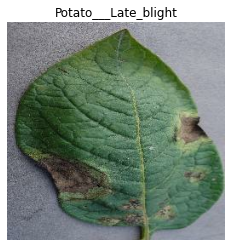

In [47]:
for image_batch, label_batch in dataset.take(1):
    # plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.imshow(image_batch[0].numpy().astype("uint8"))


    # labelling the title
    plt.title(class_names[label_batch[0]])
    # Remove the axis labeling
    plt.axis("off")

Displaying a many images once

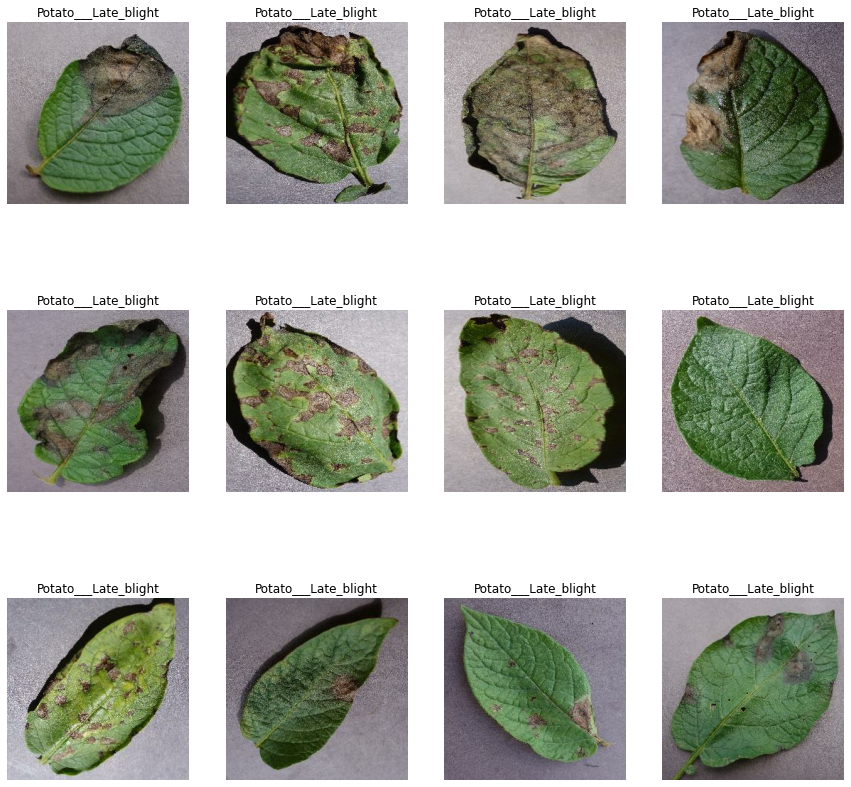

In [66]:
#Increase the dimension
plt.figure(figsize=(15, 15))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(3, 4, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # labelling the title
        plt.title(class_names[label_batch[0]])
        # Remove the axis labeling
        plt.axis("off")

Spliting our dataset into training and testing

In [57]:
len(dataset)

68

In [58]:
#  80% ==> training
#  20% ==> 10% validation, 10 % test

In [59]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

I will take 54

In [61]:
train_ds = dataset.take(54)
len(train_ds)

54

The ramaining will  be for test

In [62]:
test_ds = dataset.skip(54)
len(test_ds)

14

I need 10% for validation

In [63]:
val_size = 0.1
len(dataset) *val_size

6.800000000000001

In [64]:
# Taking 10 % from training dataset
val_ds = test_ds.take(6)
len(val_ds)

6

In [65]:
# The actual testind dataset. 
test_ds = test_ds.skip(6)
len(test_ds)

8

Creating a function

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):


    return train_ds, val_ds, test_ds